Creating Plots in Jupyter Notebooks
=============================

<div class="overview-this-is-a-title overview">
<h2 class="overview-title">Overview</h2>
    
<p>Questions</p>
    <ul>
        <li>How can I plot and annotate my data in Jupyter notebooks?
    </ul>
<p>Objectives:</p>
    <ul>
        <li>Perform linear regression on the data and obtain best fit statistics.
        <li>Create a plot of your data that includes uncertainty.
    </ul>
<p>Keypoints:</p>
    <ul>
        <li>Use the matplotlib library to prepare a plot with data and a best fit line.</li>
        <li>Use the seaborn library to create a plot that includes a confidence interval.</li>
    </ul>
</div>

## Preparing to Plot

We have just learned how to use pandas to import csv data into a dataframe that is very easy to access and use for plotting our data. In this lesson, we will create linear regression plots of our data using two different libraries, matplotlib.pyplot and seaborn. As we add more libraries to our repretoire, we are going to track them in a table.

| Library | Uses | Abbreviation |
| :------- | :----: | :------------: |
| os | file management in operating systems | os |
| numpy | calculations | np  | 
| pandas | data management | pd |
| scipy | calculations and statistics | sc or sp | 
| matplotlib.pyplot | plotting data | plt |
| seaborn | plotting data | sns |

We will start by importing the data and linear regresson analysis from the last lesson.

In [3]:
import os
import pandas as pd
protein_file = os.path.join('data', 'protein_assay.csv')
results_df = pd.read_csv(protein_file)
xdata = results_df['mass (ug)']  # Setting the x values
ydata = results_df['A-595']  # setting the y values
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
print("Slope = ", slope, "/microgram/mL", sep = "")
print("Intercept = ", intercept)
print("R-squared = ", r_value**2)
print("P value = ", p_value)
print("Standard error = ", std_err)

Slope = 0.0011136480176211455/microgram/mL
Intercept =  0.09153081057268722
R-squared =  0.9715760228371997
P value =  4.67252070582932e-05
Standard error =  8.518575456701815e-05


## Using Matplotlib.pyplot
Matplotlib is a library that contains many functions. We are going to use one subset of those functions called pyplot. This is similar to using the stats subset of the functions found in scipy. This library contains tools for plotting and annotating the data. Let's start with a simple x-y scatter plot of the data. First, we need to import the library, set the size of the figure and tell it the data to plot.

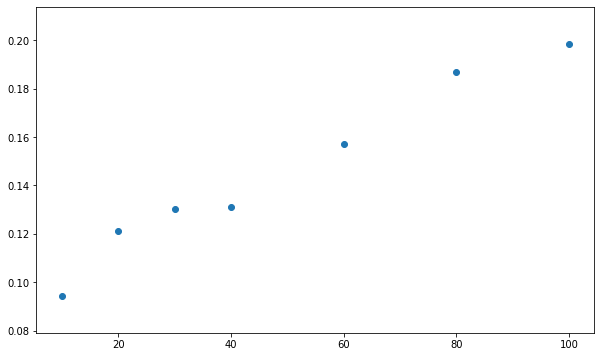

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)

Next we and the best fit line using the slope and intercept that were generated by the stats.linregress function from scipy. The first three lines in the next cell are identical to the cell above. The fourth line introduces the best fit curve. You may notice that there it takes a few seconds to generate the figure. The more complex the figure and the larger the dataset, the longer it takes for the plot to appear.

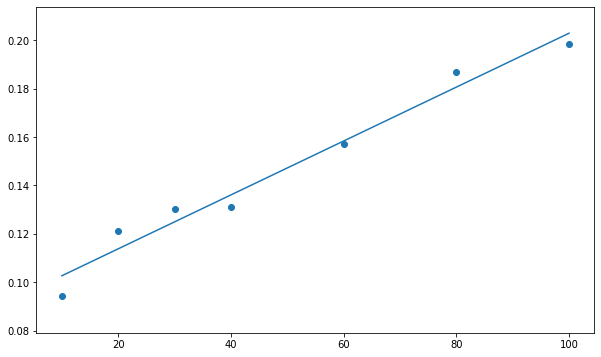

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)
plt.plot(xdata, slope * xdata + intercept)

Next we will use functions for matplotlib.pyplot to set the range for the x-axis and to provide labels for each axis. It is possible to include subscripts and Greek letters in the figure labels using LaTeX. Here is a [link to a helpful site](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) about using markdown (used for the text cells in Jupyter notebook) and LaTeX in Jupyter notebooks by Khelifi Ahmed Aziz. The command for printing the line equation includes `F`, which stands for `formatted string literal`. By using `F` it is possible to pull the values for slope and intercept that were already generated with scipy.stats. 

Text(10, 0.2, 'y = 0.0011136480176211455 * x + 0.09153081057268722')

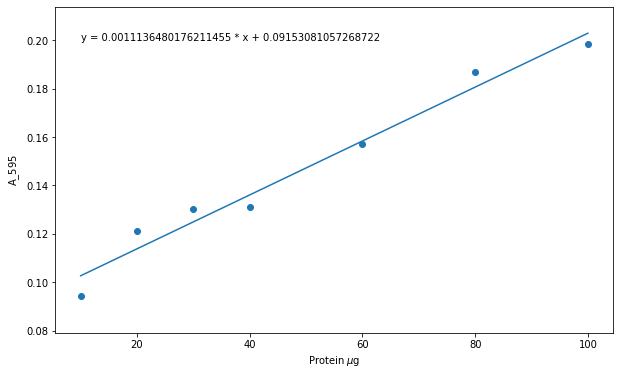

In [21]:
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)
plt.plot(xdata, slope * xdata + intercept)
plt.xlabel('Protein $\mu$g')
plt.ylabel('A$\_595$')


<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>Take some time to play with the code for the figure above. Can you move the equation to the lower right hand corner of the plot? </p>
    
```{admonition} Solution
:class: dropdown

You can simply change the xy pair in the last line of the code.

```python
    plt.annotate(F'y = {slope} * x + {intercept}', xy = (60, 0.09))    
```
```
    
</div>

You may be asking yourself, "Why didn't we generate a title for the figure?" That is certainly possible using the plt.title() function from matplotlib.pyplot. This was omitted because figures for publications and reports normally include separate text with a figure number, title and details as part of the text. To that end, we are going to explore how to produce a high resolution figure suitable for publication, which we will then learn to export to a file.

## Scatter plots with confidence intervals

To create a scatter plot with a confidence interval, you can use the *seaborn* library. Please note that seaborn has dependencies on other libraries (numpy, scipy, pandas, and matplotlib), so these must be imported before you can use seaborn. 

The following plot is based on resources at [Statology](https://www.statology.org/scatterplot-with-regression-line-python/). I prefer this plot to the simple linear regression above because it make the reliable regions of the calibration curve more obvious by displaying the 95% confidence interval. It also emphasizes the valid range for calculations based on the plot - that we can't use this curve to analyze absorbance values below 0.10 or above 0.20.

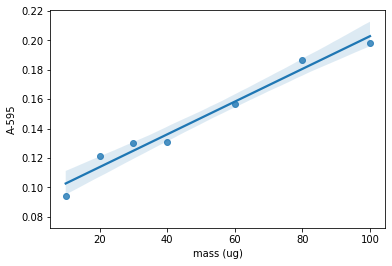

In [19]:
import seaborn as sns

sns.regplot(xdata, ydata)

Now let's try this same plot with more scattered data to see the clearly 

In [20]:
protein_file2 = os.path.join('data', 'protein_assay2.csv')
results = pd.read_csv(protein_file2)
results
xdata = results['mass (ug)']
ydata = results['A-595']
print(xdata,ydata)

0     10
1     20
2     30
3     40
4     60
5     80
6    100
Name: mass (ug), dtype: int64 0    0.091425
1    0.126328
2    0.133031
3    0.145134
4    0.145140
5    0.198546
6    0.187152
Name: A-595, dtype: float64


In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
print("Slope = ", slope, "/microgram/mL", sep = "")
print("Intercept = ", intercept)
print("R-squared = ", r_value**2)
print("P value = ", p_value)
print("Standard error = ", std_err)

Slope = 0.0010289343612334802/microgram/mL
Intercept =  0.09670261674008811
R-squared =  0.8597652528643677
P value =  0.0026370189219552267
Standard error =  0.0001858405755403407


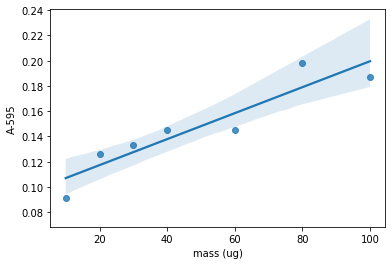

In [22]:
import seaborn as sns

sns.regplot(xdata, ydata)

### Labeling your graph
Now we're going to add some additional information to the graph using tools from matplotlib.pyplot.

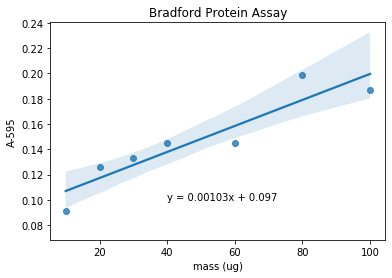

In [23]:
import seaborn as sns

fig, ax = plt.subplots()   # using functions from matplotlib.pyplot
ax.set(title='Bradford Protein Assay')
ax.annotate('y = 0.00103x + 0.097', xy=(40, 0.1))
sns.regplot(xdata, ydata)